<h3> NBA 5 year careeer prediction using XBoost Classifier

In [1]:
import pandas as pd
import numpy as np

<h4> 1. Load processed sets

<h5> Loading scaled training, validation and test sets from data_prep step saved on the data/processed folder saving them into X_train, X_val, y_train, y_val, X_test, X_test_ID variables

In [2]:
#Load Test and validation sets using custom function load_sets
from src.data.sets import load_sets

In [3]:
X_train, X_val, y_train, y_val, X_test, X_test_ID = load_sets( )

<h4> 2. Import XGBoost

<h5> Importing and fitting XGBoost Classifier specifying scale_pos_weight =0.199 to manage overfitting of the mayority class within the model, early_stopping_rounds=10 to stop the model after 10 iterations without improving in the predictions, n_estimators=200 and evaluation metric=aucpr to meassure the accuracy of the model vs the validation set

In [4]:
import xgboost as xgb

In [5]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', booster='gbtree', 
                              scale_pos_weight=0.199, n_estimators=200, seed=42)
xgb_model.fit(X_train, y_train , early_stopping_rounds=10, 
              eval_metric='aucpr', eval_set=[(X_val,y_val)])

[0]	validation_0-aucpr:0.89250
[1]	validation_0-aucpr:0.90054
[2]	validation_0-aucpr:0.90129
[3]	validation_0-aucpr:0.90427
[4]	validation_0-aucpr:0.90253
[5]	validation_0-aucpr:0.90711
[6]	validation_0-aucpr:0.90673
[7]	validation_0-aucpr:0.90830
[8]	validation_0-aucpr:0.90938
[9]	validation_0-aucpr:0.90975
[10]	validation_0-aucpr:0.90851
[11]	validation_0-aucpr:0.90858
[12]	validation_0-aucpr:0.90801
[13]	validation_0-aucpr:0.90715
[14]	validation_0-aucpr:0.90637
[15]	validation_0-aucpr:0.90635
[16]	validation_0-aucpr:0.90685
[17]	validation_0-aucpr:0.90663
[18]	validation_0-aucpr:0.90657


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

<h5> After the model has been fitted, it will be saved in the models folder in case it needs to be re-called on a later process

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
#Save model in the models folder
from joblib import dump
dump(xgb_model, '../models/XGBoost.joblib')

['../models/XGBoost.joblib']

<h4> 3.1 Generate predictions for training and validation sets in order to compare accuracy vs Baseline

In [8]:
y_val_preds = xgb_model.predict(X_val)

In [9]:
y_trainpreds = xgb_model.predict(X_train)

In [10]:
accuracy = accuracy_score(y_val, y_val_preds)
accuracy

0.670625

In [11]:
#Get error/score metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [12]:
print(mse(y_train, y_trainpreds, squared=False))
print(mae(y_train, y_trainpreds))

0.5060570619999291
0.25609375


In [13]:
print(mse(y_val, y_val_preds, squared=False))
print(mae(y_val, y_val_preds))

0.5739120141624497
0.329375


In [14]:
xgb_model.score(X_train, y_train)

0.74390625

In [15]:
xgb_model.score(X_val, y_val)

0.670625

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

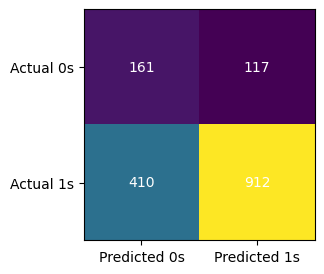

In [17]:
cm = confusion_matrix(y_val, y_val_preds)

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [18]:
y_test_preds = xgb_model.predict_proba(X_test)

In [19]:
#Create Data Frame for Doc printing
df =pd.DataFrame()

In [20]:
y_test_preds


array([[0.5973977 , 0.40260231],
       [0.36186057, 0.6381394 ],
       [0.19691747, 0.8030825 ],
       ...,
       [0.6486535 , 0.3513465 ],
       [0.23215818, 0.7678418 ],
       [0.30415577, 0.69584423]], dtype=float32)

In [21]:
target_prob = y_test_preds
target_prob = [item[1] for item in y_test_preds]

In [22]:
df['Id'] = X_test_ID
df['TARGET_5Yrs'] = target_prob

In [23]:
df.head()

,Id,TARGET_5Yrs
0,0,0.402602
1,1,0.638139
2,2,0.803083
3,3,0.869072
4,4,0.413050


In [24]:
#Saving predictions into csv
df.to_csv('../data/external/Kaggle_submission_XGBoost.csv', index=False)